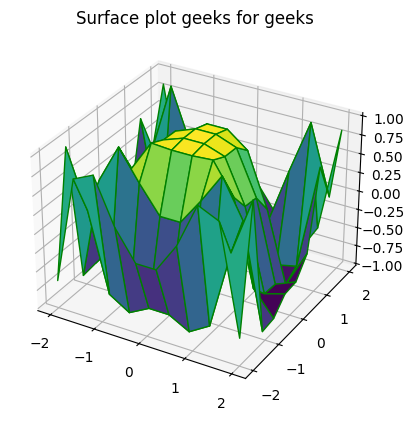

In [8]:
# importing libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import os

root_dir = os.path.abspath(os.path.join(os.getcwd(), '../../'))
data_path = os.path.join(root_dir, '/Users/sasha/Desktop/Fall 2024/COS Junior IW/Blunder-Analysis/data/xlsx/model_summary_parallel.xlsx')

# defining surface and axes
x = np.outer(np.linspace(-2, 2, 10), np.ones(10))
y = x.copy().T
z = np.cos(x ** 2 + y ** 3)

fig = plt.figure()

# syntax for 3-D plotting
ax = plt.axes(projection='3d')

# syntax for plotting
ax.plot_surface(x, y, z, cmap='viridis',\
				edgecolor='green')
ax.set_title('Surface plot geeks for geeks')
plt.show()


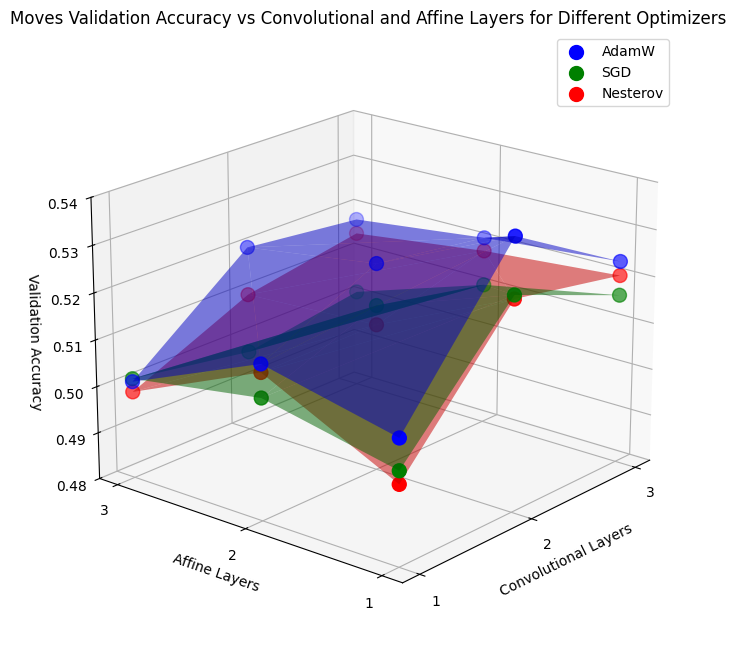

In [62]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

root_dir = os.path.abspath(os.path.join(os.getcwd(), '../../'))
data_path = os.path.join(root_dir, '/Users/sasha/Desktop/Fall 2024/COS Junior IW/Blunder-Analysis/data/xlsx/model_summary_parallel.xlsx')
df = pd.read_excel(data_path)

adamw_df = df[df['optimizer'] == 'adamw']
X_adamw = adamw_df['conv_layers'].values
Y_adamw = adamw_df['aff_layers'].values
Z_adamw = adamw_df['val_acc'].values

sgd_df = df[df['optimizer'] == 'sgd']
X_sgd = sgd_df['conv_layers'].values
Y_sgd = sgd_df['aff_layers'].values
Z_sgd = sgd_df['val_acc'].values

nesterov_df = df[df['optimizer'] == 'nesterov']
X_nesterov = nesterov_df['conv_layers'].values
Y_nesterov = nesterov_df['aff_layers'].values
Z_nesterov = nesterov_df['val_acc'].values

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot points with vertical lines starting from bottom
bottom = 0.48

# Add scatter plots and vertical lines for each optimizer
scatter_adamw = ax.scatter(X_adamw, Y_adamw, Z_adamw, c='b', s=100, label='AdamW')
scatter_sgd = ax.scatter(X_sgd, Y_sgd, Z_sgd, c='g', s=100, label='SGD')

scatter_nesterov = ax.scatter(X_nesterov, Y_nesterov, Z_nesterov, c='r', s=100, label='Nesterov')
# for i in range(len(X_nesterov)):
#     ax.plot([X_adamw[i], X_adamw[i]], [Y_adamw[i], Y_adamw[i]], [bottom, Z_adamw[i]], 'black')
#     ax.plot([X_sgd[i], X_sgd[i]], [Y_sgd[i], Y_sgd[i]], [bottom, Z_sgd[i]], 'black')
#     ax.plot([X_nesterov[i], X_nesterov[i]], [Y_nesterov[i], Y_nesterov[i]], [bottom, Z_nesterov[i]], 'black')

alpha = 0.5
ax.plot_trisurf(X_adamw, Y_adamw, Z_adamw, color='blue', alpha=alpha)
ax.plot_trisurf(X_sgd, Y_sgd, Z_sgd, color='green', alpha=alpha)
ax.plot_trisurf(X_nesterov, Y_nesterov, Z_nesterov, color='red', alpha=alpha)

# Set integer ticks for the x and y axes
ax.set_xticks([1, 2, 3])
ax.set_yticks([1, 2, 3])

# Adjust the Z-axis limits
ax.set_zlim(bottom, 0.54)

# Customize the plot
ax.view_init(elev=20, azim=220)
ax.set_xlabel('Convolutional Layers')
ax.set_ylabel('Affine Layers')
ax.set_zlabel('Validation Accuracy')
ax.set_title('Moves Validation Accuracy vs Convolutional and Affine Layers for Different Optimizers')

# Add a legend
ax.legend()

# Show the plot
plt.show()